#### Loading Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('irrigation_machine.csv')

In [3]:
data.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [4]:
data.dtypes

Unnamed: 0      int64
sensor_0      float64
sensor_1      float64
sensor_2      float64
sensor_3      float64
sensor_4      float64
sensor_5      float64
sensor_6      float64
sensor_7      float64
sensor_8      float64
sensor_9      float64
sensor_10     float64
sensor_11     float64
sensor_12     float64
sensor_13     float64
sensor_14     float64
sensor_15     float64
sensor_16     float64
sensor_17     float64
sensor_18     float64
sensor_19     float64
parcel_0        int64
parcel_1        int64
parcel_2        int64
dtype: object

In [5]:
# Describe the data
print('Dataset stats: \n', data.describe())

Dataset stats: 
         Unnamed: 0     sensor_0     sensor_1     sensor_2     sensor_3  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    999.500000     1.437000     1.659000     2.654500     2.674500   
std     577.494589     1.321327     1.338512     1.699286     1.855875   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     499.750000     0.000000     1.000000     1.000000     1.000000   
50%     999.500000     1.000000     1.000000     2.000000     2.000000   
75%    1499.250000     2.000000     2.000000     4.000000     4.000000   
max    1999.000000     8.000000     9.000000    10.000000    11.000000   

          sensor_4     sensor_5     sensor_6     sensor_7     sensor_8  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      2.887500     1.411000     3.315500     4.201500     1.214000  ...   
std       1.816451     1.339394     2.206444     2.280241     1.386782  ...   


In [6]:
# Count the number of observations of each class
print('Observations per class 0: \n', data['parcel_0'].value_counts())
print('Observations per class 1: \n', data['parcel_1'].value_counts())
print('Observations per class 2: \n', data['parcel_2'].value_counts())

Observations per class 0: 
 1    1271
0     729
Name: parcel_0, dtype: int64
Observations per class 1: 
 1    1461
0     539
Name: parcel_1, dtype: int64
Observations per class 2: 
 0    1576
1     424
Name: parcel_2, dtype: int64


#### Data preparation

In [7]:
from sklearn.model_selection import train_test_split
y = data[['parcel_0','parcel_1','parcel_2']]
X = data.drop(['parcel_0','parcel_1','parcel_2','Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#### Model configuration

In [8]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense


def ModelWrapper(activation):
    # Instantiate a Sequential model
    model = Sequential()

    # Add a hidden layer of 64 neurons and a 20 neuron's input
    model.add(Dense(64, input_shape=(20,), activation=activation))

    # Add an output layer of 3 neurons with sigmoid activation
    model.add(Dense(3, activation='sigmoid'))

    # Compile your model with adam and binary crossentropy loss
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Compile your model using categorical_crossentropy loss
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Using TensorFlow backend.


#### Model tranining

In [9]:
# Activation functions to try
activations = ['relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = ModelWrapper(act)
  # Fit the model
  history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, verbose=0)
  activation_results[act] = history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [10]:
relu_loss = pd.DataFrame(activation_results["relu"].history['val_loss']).rename(columns={0: "relu"})
relu_sigmoid = pd.DataFrame(activation_results["sigmoid"].history['val_loss']).rename(columns={0: "sigmoid"})
relu_tanh = pd.DataFrame(activation_results["tanh"].history['val_loss']).rename(columns={0: "tanh"})
val_loss = relu_loss.join(relu_sigmoid).join(relu_tanh)

In [11]:
relu_loss = pd.DataFrame(activation_results["relu"].history['val_accuracy']).rename(columns={0: "relu"})
relu_sigmoid = pd.DataFrame(activation_results["sigmoid"].history['val_accuracy']).rename(columns={0: "sigmoid"})
relu_tanh = pd.DataFrame(activation_results["tanh"].history['val_accuracy']).rename(columns={0: "tanh"})
val_accuracy = relu_loss.join(relu_sigmoid).join(relu_tanh)

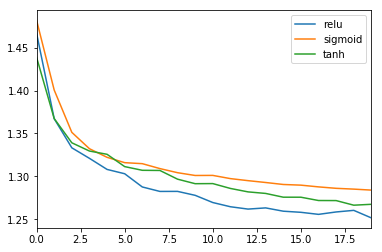

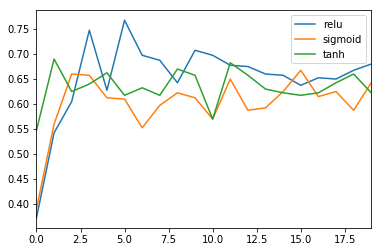

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_accuracy)

# Call plot on the dataframe
val_acc.plot()
plt.show()